<a href="https://colab.research.google.com/github/Bobby9800/STATSANDSCANS/blob/main/Logistic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [3]:
# Load the data
data = pd.read_csv("germancredit.csv")
data.head(3)


,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201


In [4]:
#checking Missing values
data.isnull().sum()

,0
Default,0
checkingstatus1,0
duration,0
history,0
purpose,0
amount,0
savings,0
employ,0
installment,0
status,0


In [5]:
# Checking for duplicates
duplicates = data.duplicated()
print(duplicates.sum())


0


In [6]:
# Removing duplicates
data.drop_duplicates(inplace=True)

In [7]:
data.describe()

,Default,duration,amount,installment,residence,age,cards,liable
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


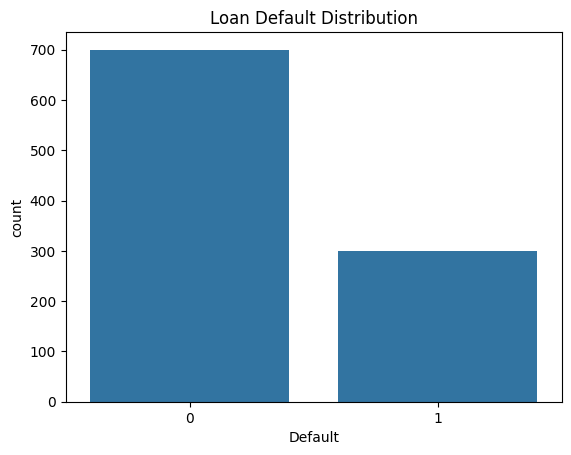

In [10]:
# Visualize class distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Default', data=data)
plt.title('Loan Default Distribution')
plt.show()

In [16]:
# Encode the 'history' column with numerical values
history_mapping = {
    'A30': 0,
    'A31': 1,
    'A32': 2,
    'A33': 3,
    'A34': 4,
    'A35': 5
}
data['history'] = data['history'].map(history_mapping)

In [17]:
# Select columns
selected_columns = ['duration', 'amount', 'installment', 'age', 'history', 'purpose', 'housing']
X = data[selected_columns]
y = data['Default']

In [18]:
# One-hot encoding categoricals
X = pd.get_dummies(X, columns=['purpose', 'housing'], drop_first=True)

In [19]:
# Scaling numerical features
scaler = StandardScaler()
X[['duration', 'amount', 'installment', 'age']] = scaler.fit_transform(X[['duration', 'amount', 'installment', 'age']])

In [20]:
# Splitting the data to (train  and Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [21]:
# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# test set
y_pred = model.predict(X_test)

In [23]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 77.00%

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85        70
           1       0.67      0.47      0.55        30

    accuracy                           0.77       100
   macro avg       0.73      0.68      0.70       100
weighted avg       0.76      0.77      0.76       100



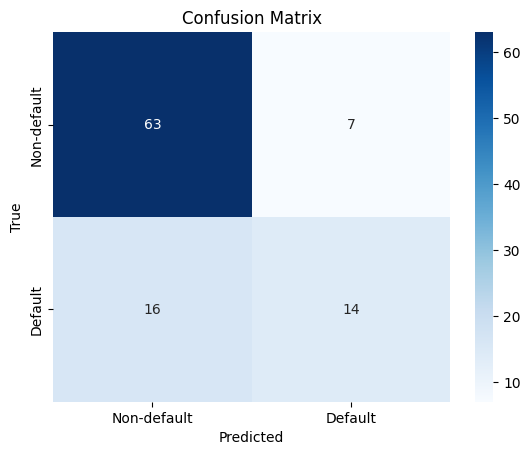

In [24]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-default', 'Default'], yticklabels=['Non-default', 'Default'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [27]:
# logistic regression coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

print("\nLogistic Regression Coefficients:\n")
print(coefficients.sort_values(by='Coefficient', ascending=False))


Logistic Regression Coefficients:

         Feature  Coefficient
0       duration     0.352191
2    installment     0.319567
11   purpose_A46     0.319497
1         amount     0.274912
10   purpose_A45     0.047044
15  housing_A153    -0.074967
9    purpose_A44    -0.121398
3            age    -0.170534
7    purpose_A42    -0.220128
6   purpose_A410    -0.435402
4        history    -0.459556
14  housing_A152    -0.507844
13   purpose_A49    -0.530204
12   purpose_A48    -0.693222
8    purpose_A43    -0.735863
5    purpose_A41    -1.415352


In [39]:
y_pred = model.predict(X_test)
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[63  7]
 [16 14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        70
           1       0.67      0.47      0.55        30

    accuracy                           0.77       100
   macro avg       0.73      0.68      0.70       100
weighted avg       0.76      0.77      0.76       100



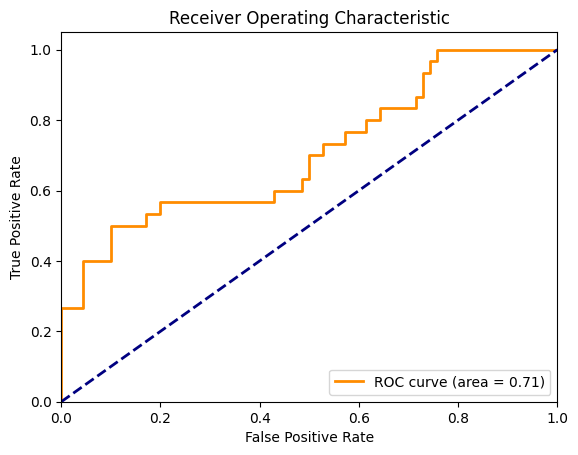

AUC: 0.71


In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
#ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
print(f"AUC: {roc_auc:.2f}")


In [42]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
